In [1]:
## SOLUÇÃO PARA A QUESTÃO 2
# 0- Ler datasets
# 1- pegar id da disciplina no componentes-curriculares-presenciais.csv
# 2- fitrar através desse id e obter o id das turmas no dataset de turmas
# 3- fazer o passo 1 e 2 para as disciplinas fmc1 e fmc2
# 4- em matrículas
#   4.1 filtrar todo o dataset somente para os ids da turma de fmc1 e fmc2
#   4.2 obter os ids dos alunos aprovados em fmc2
#   4.3 filtrar todo o dataset para somente esses ids e reprovações
#   4.4 passar por cada id, calcular e guardar a média deles em fmc1 e fmc2
#   4.5 montar gráfico
import pandas as pd
import numpy as np
#0
#read componentes curriculares
componentes_path = 'csv/componentes/componentes-curriculares-presenciais.csv'
print("Reading " + componentes_path + "\n")
componentes = pd.read_csv(componentes_path, sep=';')

#read matrículas
matr_path = ['csv/matriculas/matricula-componente-20171.csv','csv/matriculas/matricula-componente-20172.csv',
                'csv/matriculas/matriculas-de-2016.1.csv', 'csv/matriculas/matriculas-de-2016.2.csv',
                'csv/matriculas/matriculas-de-2015.1.csv', 'csv/matriculas/matriculas-de-2015.2.csv',
                'csv/matriculas/matricula-componente-20141.csv', 'csv/matriculas/matricula-componente-20142.csv',
                'csv/matriculas/matricula-componente-20131.csv', 'csv/matriculas/matricula-componente-20132.csv']
matr = []
for i in matr_path:
    print("Reading " + i)
    matr.append( pd.read_csv(i, sep=';') )

print("Merging datasets...\n")
matr = pd.concat(matr)

#read turmas
turmas_path = ['csv/turmas/turmas-2017.1.csv','csv/turmas/turmas-2017.2.csv',
              'csv/turmas/turmas-2016.1.csv', 'csv/turmas/turmas-2016.2.csv',
              'csv/turmas/turmas-2015.1.csv', 'csv/turmas/turmas-2015.2.csv',
              'csv/turmas/turmas-2014.1.csv', 'csv/turmas/turmas-2014.2.csv',
              'csv/turmas/turmas-2013.1.csv', 'csv/turmas/turmas-2013.2.csv']
turmas = []
for i in turmas_path:
    print("Reading " + i)
    turmas.append( pd.read_csv(i, sep=';') )
    
print("Merging datasets...\n")
turmas = pd.concat(turmas)

Reading csv/componentes/componentes-curriculares-presenciais.csv

Reading csv/matriculas/matricula-componente-20171.csv
Reading csv/matriculas/matricula-componente-20172.csv
Reading csv/matriculas/matriculas-de-2016.1.csv
Reading csv/matriculas/matriculas-de-2016.2.csv
Reading csv/matriculas/matriculas-de-2015.1.csv
Reading csv/matriculas/matriculas-de-2015.2.csv
Reading csv/matriculas/matricula-componente-20141.csv
Reading csv/matriculas/matricula-componente-20142.csv
Reading csv/matriculas/matricula-componente-20131.csv
Reading csv/matriculas/matricula-componente-20132.csv
Merging datasets...

Reading csv/turmas/turmas-2017.1.csv
Reading csv/turmas/turmas-2017.2.csv
Reading csv/turmas/turmas-2016.1.csv
Reading csv/turmas/turmas-2016.2.csv
Reading csv/turmas/turmas-2015.1.csv
Reading csv/turmas/turmas-2015.2.csv
Reading csv/turmas/turmas-2014.1.csv
Reading csv/turmas/turmas-2014.2.csv
Reading csv/turmas/turmas-2013.1.csv
Reading csv/turmas/turmas-2013.2.csv
Merging datasets...



In [2]:
#1
componentes_imd = componentes[componentes["codigo"].str.contains("IMD")]

id_comp_fmc1 = componentes_imd[componentes_imd["nome"] == ("FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO I")]["id_componente"]
id_comp_fmc2 = componentes_imd[componentes_imd["nome"] == ("FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO II")]["id_componente"]

In [4]:
#2 e 3
# for i in id_comp_fmc1:
#     classes_fmc1 = turmas[turmas["id_componente_curricular"]== np.int64(i)]
# for i in id_comp_fmc2:
#     classes_fmc2 = turmas[turmas["id_componente_curricular"]== np.int64(i)]
classes_fmc1 = turmas[turmas["id_componente_curricular"]==55025]
classes_fmc2 = turmas[turmas["id_componente_curricular"]== 55022]

classes_fmc1_ids = classes_fmc1["id_turma"]
classes_fmc2_ids = classes_fmc2["id_turma"]

print("Turmas em fmc1 = " + str(len(classes_fmc1)))
print("Turmas em fmc2 = " + str(len(classes_fmc2)))

Turmas em fmc1 = 18
Turmas em fmc2 = 31


In [5]:
#4.1
fragments = []
for i in classes_fmc1_ids:
    fragments.append(matr[matr["id_turma"] == np.int64(i)])
alunos_fmc1 = pd.concat(fragments)

fragments = []
for i in classes_fmc2_ids:
    fragments.append(matr[matr["id_turma"] == np.int64(i)])
alunos_fmc2 = pd.concat(fragments)

In [6]:
#4.2
aprovados_fmc2 = alunos_fmc2[alunos_fmc2["descricao"] == "APROVADO POR NOTA"]
aprovados_fmc2_discente = aprovados_fmc2["discente"].unique()



#4.3
fragments = []
for i in aprovados_fmc2_discente:
    fragments.append(alunos_fmc1[alunos_fmc1["discente"] == i])
alunos_fmc1_aprovados_fmc2 = pd.concat(fragments)
alunos_fmc1_aprovados_fmc2 = alunos_fmc1_aprovados_fmc2[alunos_fmc1_aprovados_fmc2["descricao"] == "APROVADO POR NOTA"]
alunos_fmc1_aprovados_id = alunos_fmc1_aprovados_fmc2["discente"].unique()

#O dataset de fmc2 ficou maior. indica que a maioria de alunos em fmc2 não vem de fmc1. logo, deve-se filtrar esses alunos

fragments = []
for i in alunos_fmc1_aprovados_id:
    fragments.append(aprovados_fmc2[aprovados_fmc2["discente"] == i])
aprovados_fmc2 = pd.concat(fragments)

#agora, o dataset de fmc1 está maior. significando que tem mais de um cadastro para um aluno.
#tal duplicação pode ser resolvida com drop_duplicates :D
fragments = []
for i in alunos_fmc1_aprovados_id:
    fragments.append(alunos_fmc1_aprovados_fmc2[alunos_fmc1_aprovados_fmc2["discente"] == i].drop_duplicates("unidade"))
alunos_fmc1_aprovados_fmc2 = pd.concat(fragments)



print("Tamanho do dataset de fmc1 = " + str(len(alunos_fmc1_aprovados_fmc2)))
print("Tamanho do dataset de fmc2 = " + str(len(aprovados_fmc2)))

aprovados_fmc2

Tamanho do dataset de fmc1 = 123
Tamanho do dataset de fmc2 = 123


,Unnamed: 10,descricao,discente,faltas_unidade,id_curso,id_turma,media_final,nota,numero_total_faltas,reposicao,unidade
180178,NaN,APROVADO POR NOTA,97fe348def50c5c3375b5167701c7202,0.0,92127264.0,57576596,5.6,3.0,2.0,f,2.0
180179,NaN,APROVADO POR NOTA,97fe348def50c5c3375b5167701c7202,0.0,92127264.0,57576596,5.6,6.4,2.0,f,3.0
180180,NaN,APROVADO POR NOTA,97fe348def50c5c3375b5167701c7202,0.0,92127264.0,57576596,5.6,7.4,2.0,f,1.0
398763,NaN,APROVADO POR NOTA,1deed8f21a895fa8446751ffd0b079f6,0.0,92127264.0,57576597,6.5,2.5,8.0,t,1.0
398764,NaN,APROVADO POR NOTA,1deed8f21a895fa8446751ffd0b079f6,0.0,92127264.0,57576597,6.5,9.1,8.0,f,2.0
398765,NaN,APROVADO POR NOTA,1deed8f21a895fa8446751ffd0b079f6,0.0,92127264.0,57576597,6.5,6.0,8.0,f,3.0
486132,NaN,APROVADO POR NOTA,0de7678ddb2772b5d052364c45fc73fa,0.0,92127264.0,57586303,5.0,5.2,2.0,f,2.0
486133,NaN,APROVADO POR NOTA,0de7678ddb2772b5d052364c45fc73fa,0.0,92127264.0,57586303,5.0,3.0,2.0,f,1.0
486134,NaN,APROVADO POR NOTA,0de7678ddb2772b5d052364c45fc73fa,0.0,92127264.0,57586303,5.0,6.8,2.0,f,3.0
486149,NaN,APROVADO POR NOTA,546ba6351f2d602f94bbb41f01c1a0ee,0.0,92127264.0,57586303,6.2,5.5,4.0,f,1.0


In [8]:
#4.4
#dados uteis:
# aprovados_fmc2 -> dataset dos alunos aprovados em fmc2
# aprovados_fmc2_discente -> id's dos alunos aprovados em fmc2 (e consequentemente em fmc1)
# alunos_fmc1_aprovados_fmc2 -> dataset dos alunos de fmc1 aprovados em fmc1 e fmc2
notas_fmc1 = []
notas_fmc2 = []
for i in alunos_fmc1_aprovados_fmc2["discente"].unique():
    notas = alunos_fmc1_aprovados_fmc2[alunos_fmc1_aprovados_fmc2["discente"]==i]["nota"]
    a = float(notas[:1])
    b = float(notas[1:2])
    c = float(notas[2:3])
    notas_fmc1.append((a+b+c)/3)
    
    notas = aprovados_fmc2[aprovados_fmc2["discente"]==i]["nota"]
    a = float(notas[:1])
    b = float(notas[1:2])
    c = float(notas[2:3])
    notas_fmc2.append((a+b+c)/3)


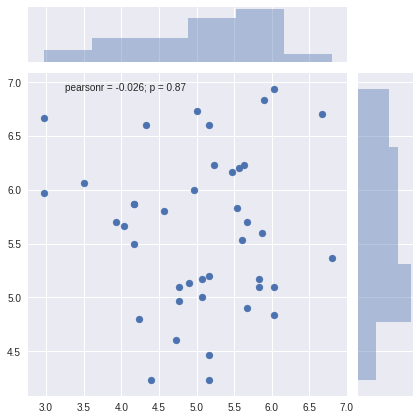

In [9]:
#4.5
import matplotlib.pyplot as plt
import seaborn as sns
notas_fmc1 = np.array(notas_fmc1)
notas_fmc2 = np.array(notas_fmc2)
g = sns.jointplot(notas_fmc1, notas_fmc2)
plt.show()